# Stock Price Prediction with LSTM

In this notebook, we demonstrate how to:
- Download stock data
- Preprocess it using sliding windows
- Train an LSTM model to predict the next day's closing price
- Evaluate the model
- Visualize predictions against actual prices

## Step 1: Setup and Imports

In [2]:
%pip install -r requirements.txt

  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached curl_cffi-0.11.3-cp39-abi3-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached yfinance-0.2.63-py2.py3-none-any.whl (118 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached curl_cffi-0.11.3-cp39-abi3-macosx_11_0_arm64.whl (3.0 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-macosx_11_0_arm64.whl size=271269 sha256=5e3b497290662da1c682d90725c40379a1bdfdd0c3f08cd599850002c783b92f
  Stored in directory: /Users/haozhen/Library/Caches/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Succ

In [1]:
import torch
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
from models.lstm_model import LSTMModel
from data.fetch_data import download_stock_data
from utils.preprocess import preprocess
from sklearn.preprocessing import MinMaxScaler

/opt/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


## Step 2: Load and Preprocess Data

In [2]:
# Hyperparameters
WINDOW_SIZE = 60

# Download and prepare data
stock_df = download_stock_data("AAPL", start_date="2020-01-01", end_date="2023-01-01")
X, y, scaler = preprocess(stock_df, window_size=WINDOW_SIZE)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split into training and testing
split = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:split], X_tensor[split:]
y_train, y_test = y_tensor[:split], y_tensor[split:]

/Users/haozhen/Desktop/finsight/backend/data/fetch_data.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


## Step 3: Load Trained LSTM Model

In [5]:
model = LSTMModel(hidden_size=50, num_layers=2, dropout=0.2)
model.load_state_dict(torch.load("../models/trained_lstm_model.pth"))
model.eval()

LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

## Step 4: Make Predictions

In [7]:
with torch.no_grad():
    predicted = model(X_test)
    predicted_np = scaler.inverse_transform(predicted.numpy())
    actual_np = scaler.inverse_transform(y_test.numpy())

## Step 5: Plot Predictions

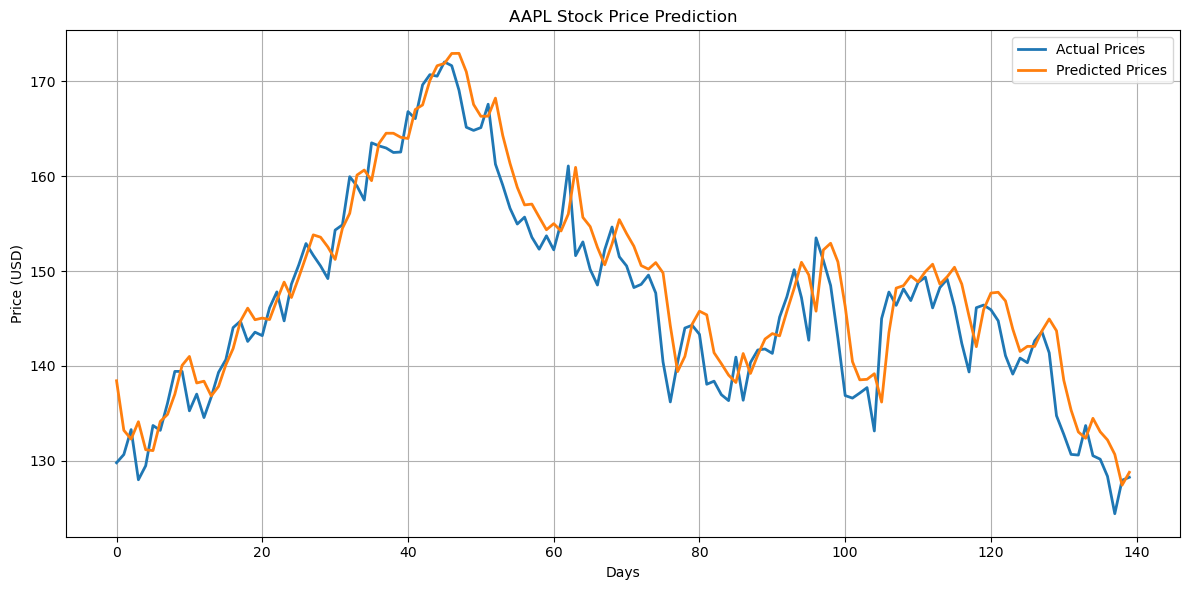

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(actual_np, label='Actual Prices', linewidth=2)
plt.plot(predicted_np, label='Predicted Prices', linewidth=2)
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()